In [1]:
# https://civitai.com/models/21036/artraccoonee-beautyraccoonmix?modelVersionId=27821

from diffusers import StableDiffusionImg2ImgPipeline
import requests
import torch
from PIL import Image
from io import BytesIO

checkpoint_path = "/home/ubuntu/work/Artraccoonee_v12FullNoVAE.safetensors"
pipe = StableDiffusionImg2ImgPipeline.from_single_file(checkpoint_path, torch_dtype=torch.float16)

pipe = pipe.to("cuda")

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [2]:
url = "./lora/노규남.jpg"

init_image = Image.open(url).convert("RGB")

prompt = "a korean guy wearing glasses and necktie"
torch.manual_seed(0)
images = pipe(prompt=prompt, image=init_image, strength=0.9, guidance_scale=7, num_inference_steps=150).images

  0%|          | 0/135 [00:00<?, ?it/s]

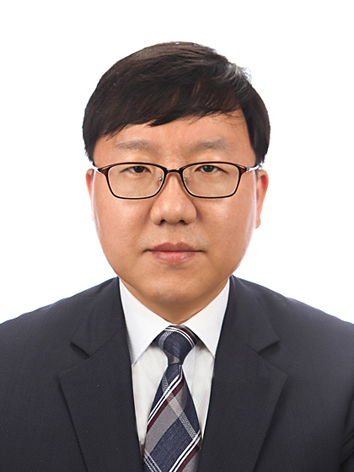

In [3]:
init_image

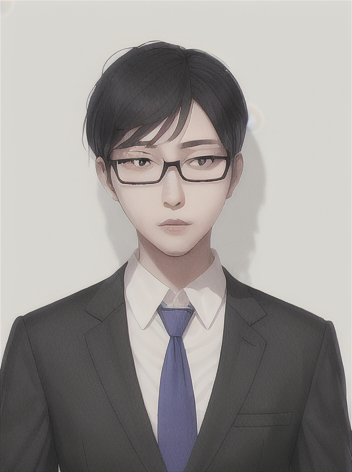

In [4]:
images[0]

In [5]:
# https://civitai.com/models/509457/yinny1?modelVersionId=566196
pipe.load_lora_weights("./lora/Handsome.safetensors", adapter_name="Handsome")

In [6]:
url = "./lora/노규남.jpg"

init_image = Image.open(url).convert("RGB")

prompt = "bust_shot,peace_sign,glasses,black_eyes,front <lora:suguru_getou:0.8>"
torch.manual_seed(0)
images = pipe(prompt=prompt, image=init_image, strength=0.6, guidance_scale=7, num_inference_steps=150).images

  0%|          | 0/90 [00:00<?, ?it/s]

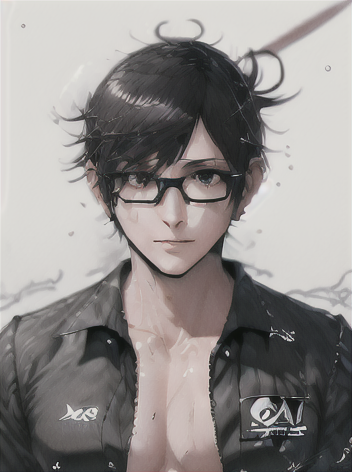

In [7]:
images[0]

In [9]:
import gradio as gr
from PIL import Image
import torch
from diffusers import StableDiffusionImg2ImgPipeline

model_id = "/home/ubuntu/work/Artraccoonee_v12FullNoVAE.safetensors"
pipe = StableDiffusionImg2ImgPipeline.from_single_file(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.load_lora_weights("./lora/Handsome.safetensors", adapter_name="Handsome")

def img2img(input_image, prompt, strength, guidance_scale, steps):
    input_image = input_image.convert("RGB")
    
    output_image = pipe(
        prompt=prompt,
        image=input_image,
        strength=strength,
        guidance_scale=guidance_scale,
        num_inference_steps=steps
    ).images[0]
    
    return output_image

iface = gr.Interface(
    fn=img2img,
    inputs=[
        gr.Image(type="pil", label="입력 이미지"),
        gr.Textbox(label="프롬프트", value = "bust_shot,peace_sign,glasses,black_eyes,front <lora:suguru_getou:0.8>"),
        gr.Slider(0, 1, value=0.6, step=0.01, label="변형 강도"),
        gr.Slider(1, 20, value=7.0, step=0.1, label="가이던스 스케일"),
        gr.Slider(100, 500, value=150, step=10, label="스텝수")
    ],
    outputs=gr.Image(type="pil", label="출력 이미지"),
    title="Stable Diffusion img2img",
    description="입력 이미지를 프롬프트에 따라 변형합니다."
)

iface.launch(share=True)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://68ea570243a8036114.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/90 [00:00<?, ?it/s]